# Analysis of the impact of resistance mixing for each pathotype

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sci

## Preprocessing

In [2]:
levels = [i for i in range(6)]
pathotypes = ['P0', 'P12', 'P123']

try :
    del resistance_data
except NameError:
    pass


for p in pathotypes:
    for l in levels:
        folder_name = '~/Dropbox/TFG/ArcadeSpots3/data/run3/res_%d_%s' % (l,p)
        file_name   = 'timeSeriesStatistics_%s.csv' % p
        temp = pd.read_csv(folder_name + '/' + file_name)
        temp['level'] = l
        temp['pathotype'] = p
        temp['sim'] = temp['sim ']
        del temp['sim ']
        try :
            resistance_data = pd.concat((resistance_data, temp))
        except NameError:
            resistance_data = temp.copy()
del temp
resistance_data

,crop,time,exposition,infective,alive,inoculum,level,pathotype,sim
0,0,0,0.0001,0.0000,1.0000,0.00,0,P0,24
1,0,1,0.0001,0.0000,1.0000,0.00,0,P0,24
2,0,2,0.0001,0.0000,1.0000,0.00,0,P0,24
3,0,3,0.0001,0.0000,1.0000,0.00,0,P0,24
4,0,4,0.0001,0.0000,1.0000,0.00,0,P0,24
5,0,5,0.0001,0.0000,1.0000,0.00,0,P0,24
6,0,6,0.0001,0.0001,1.0000,0.00,0,P0,24
7,0,7,0.0007,0.0001,1.0000,0.00,0,P0,24
8,0,8,0.0014,0.0001,1.0000,0.00,0,P0,24
9,0,9,0.0019,0.0001,1.0000,0.00,0,P0,24


In [4]:
resistance_by_level_crop = resistance_data.groupby(['level', 'crop', 'pathotype', 'sim'], 
                                                   as_index=False).max()

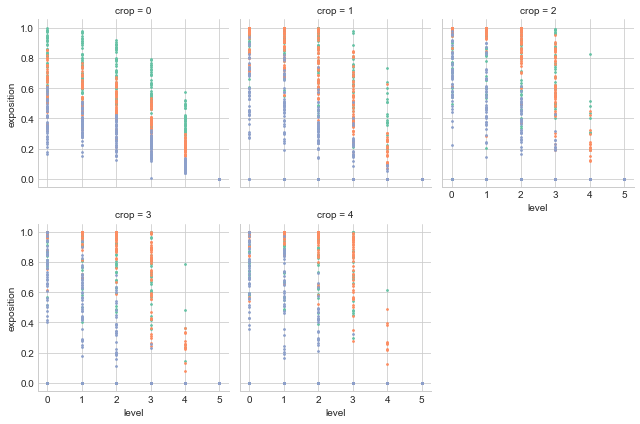

In [5]:
sns.set_style('whitegrid')
sns.set_palette('Set2')
resistant_fraction = np.arange(0.0, 1.2, 0.2)
g = sns.FacetGrid(resistance_by_level_crop,  col = 'crop', col_wrap=3,
                  hue='pathotype', size = 3)
g.map(plt.scatter, 'level', 'exposition', s=3)
#g.set_xticklabels([i for i in resistant_fraction])
plt.show()

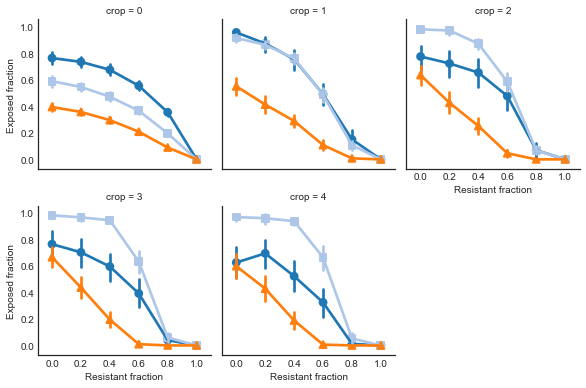

In [39]:
sns.set_style('white')
sns.set_palette('tab20')
resistant_fraction = np.arange(0.0, 1.2, 0.2)
#resistance_by_level_crop['normalized_alive'] = (resistance_by_level_crop['alive'] -resistant_fraction[resistance_by_level_crop['level']]) / (1-resistant_fraction[resistance_by_level_crop['level']]) 
#resistance_by_level_crop['norm_exposed'] = (resistance_by_level_crop['exposition'])
g = sns.FacetGrid(resistance_by_level_crop,  col = 'crop', col_wrap=3,
                  hue='pathotype', size = 2.75, hue_kws=dict(markers=["o", "s", "^"]))#, despine = False)
g = g.map(sns.pointplot, 'level', 'exposition' )
#g.add_legend()
g.set_xticklabels([i for i in resistant_fraction])
g.set_xlabels('Resistant fraction')
g.set_ylabels('Exposed fraction')
plt.savefig('C:/Users/Bruno/Dropbox/ARTICULOS/cpv_2016/figures/figure_4.png', dpi=300)
plt.show()

## Analysis of $R_{0}$ by sanity index

In [6]:
from scipy.optimize import minimize
class SI_r0:
    def __init__(self, **parameters):
        self.__I = parameters['I']

        self.__S = parameters['S']
        self.__I0 = parameters['I0']
        self.__time = parameters['time']
    def simulate(self,x):
        beta = x[0]
        mu = x[1]
        I = np.zeros(self.__time)
        S = np.zeros(self.__time)
        I[0]= self.__I0
        S[0] = 1- I[0]
        for i in range(1,self.__time):
            I[i] = I[i-1] + beta*I[i-1]*S[i-1] - mu*I[i-1]
            S[i] = S[i-1] - beta*I[i-1]*S[i-1]
        return I,S
    def getVal(self,x):
        I,S = self.simulate(x)
        functional = ((I - self.__I) ** 2) + ((S - self.__S) ** 2)
        return np.sum(functional)
    def optimize(self,x0):
        res = minimize(self.getVal, x0, method='Nelder-Mead', tol=1e-6)
        return res.x
def getR2(I,S):
    model = SI_r0(I=I, S=S, I0=0.0001, time=180)
    x0 = [0.1, 0.025]
    x = model.optimize(x0)
    return x[0] / x[1]
        

In [7]:
sanity_r2 = resistance_data.query('crop==0').groupby(['crop', 
                                                      'level', 
                                                      'sim', 
                                                      'pathotype'], as_index=False).apply(lambda x : getR2(x['infective'], x['alive']-x['infective']))

In [9]:
r2 = pd.DataFrame(sanity_r2)
r2.reset_index(level=0, inplace=True)
r2.reset_index(level=0, inplace=True)
r2.reset_index(level=0, inplace=True)
r2.reset_index(level=0, inplace=True)
r2.columns = ['pathotype', 'sim', 'sanity_index', 'crop', 'r2']


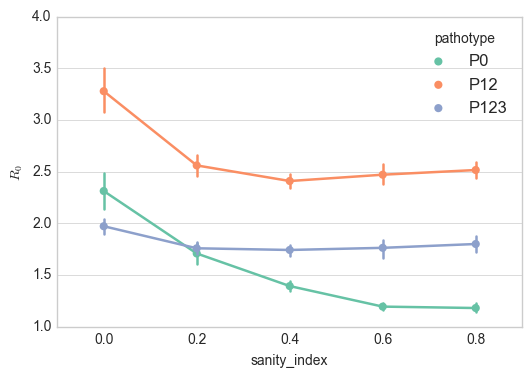

In [19]:
fig, ax = plt.subplots(1)
sns.pointplot(x = 'sanity_index', y='r2', hue='pathotype', data = r2.query('sanity_index != 5'), 
              ax = ax)
ax.set_xticklabels([i for i in resistant_fraction])
ax.set_ylabel('$R_{0}$')
plt.show()

## Analysis of impact of resistance mixing in heterogeneous population

In [4]:
pathotypes = ['P0', 'P12', 'P123']
resistance_mixing_types = ['L3L4', 'LpL3', 'LpL4']
try :
    del res_data
except NameError:
    pass
for i in resistance_mixing_types :
    for j in range(6):
        for k in pathotypes :
            foldername =  'C:/Users/Bruno/Dropbox/TFG/ArcadeSpots3/data/run7/res_C_%s_%d' % (
                i, j
            )
            tmp = pd.read_csv(foldername + '/timeSeriesStatistics_%s.csv' % k)
            tmp.rename(inplace = True, columns = {'sim ':'sim'})
            tmp['sim_time'] = (tmp['crop'] * 365) + tmp['time']
            tmp['patho'] = k
            tmp['resistance_mix'] = i
            tmp['resistance_mix_level'] = j
            try :
                res_data = pd.concat((tmp, res_data))
            except NameError:
                res_data = tmp

In [10]:
res_data_max = res_data.groupby(['crop', 'sim', 'patho', 'resistance_mix', 'resistance_mix_level'], as_index = False).max()

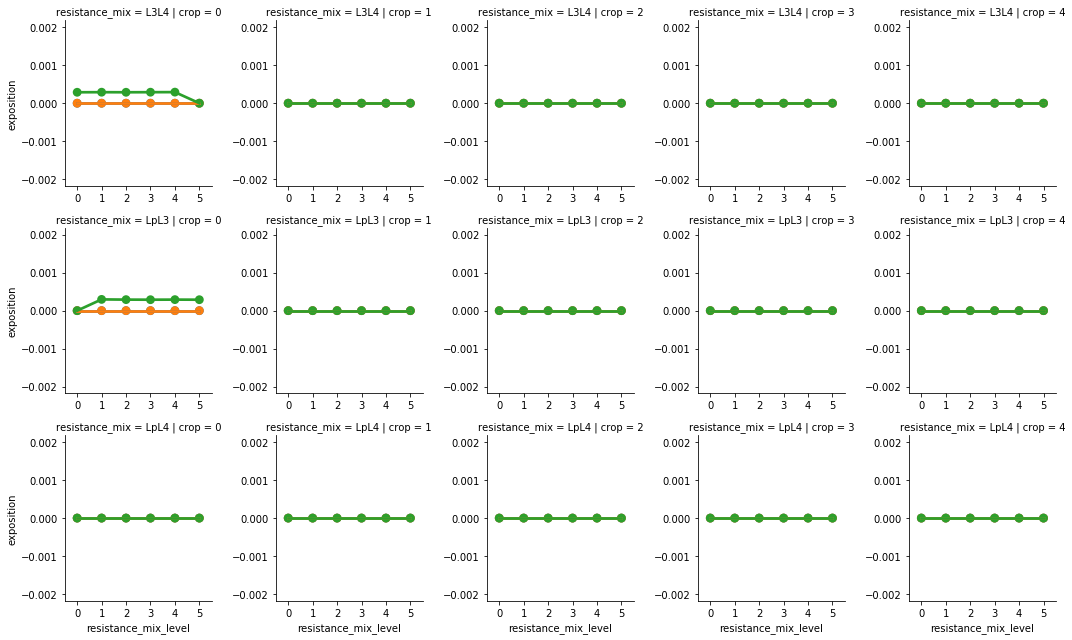

In [12]:
g = sns.FacetGrid(data = res_data_max, hue = 'patho', col = 'crop', row = 'resistance_mix')
g.map(sns.pointplot, 'resistance_mix_level', 'exposition')
plt.show()

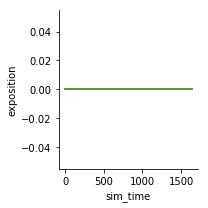

In [17]:
ex1 = res_data.query('sim == 0 and resistance_mix_level == 3 and resistance_mix == "LpL4"')
g = sns.FacetGrid(data = ex1, hue = 'patho')
g.map(plt.plot, 'sim_time', 'exposition')
plt.show()